In [1]:
import mesos_rb as m
import time
from matplotlib import *
from pylab import *
from numpy import *


%matplotlib inline

In [2]:
import mesos_rb as m
import time
from matplotlib import *
import matplotlib.pylab as pylab
from pylab import *
from numpy import *


%matplotlib inline


def sortvalues(input_list, reference_list, output_list):
    for name in reference_list[0]:
        for user in input_list.keys():
            if user == name:
                output_list.append(input_list[user])
                break
            
            
def autolabel(rects,values):
    # attach number values to graph
    index = 0
    for rect in rects:
        length = values[index]
        height = rect.get_y()
        pyplot.text(float(values[index] + .1), rect.get_y() + .035, '{length}'.format(length=length),fontsize=20,)
        index += 1

Fetch review data from ReviewBoard
---

In [3]:
# Cut Off Date
CUTOFF_DAYS = 1

# set stat equal to either 'discarded', 'pending', or 'submitted'
stat = 'pending'

reviews = m.fetch_reviews(stat, CUTOFF_DAYS, 0)

Fetching pending reviews from Review Board. Please wait...
Processed 23 reviews.


Review of Defined Type Per User
---

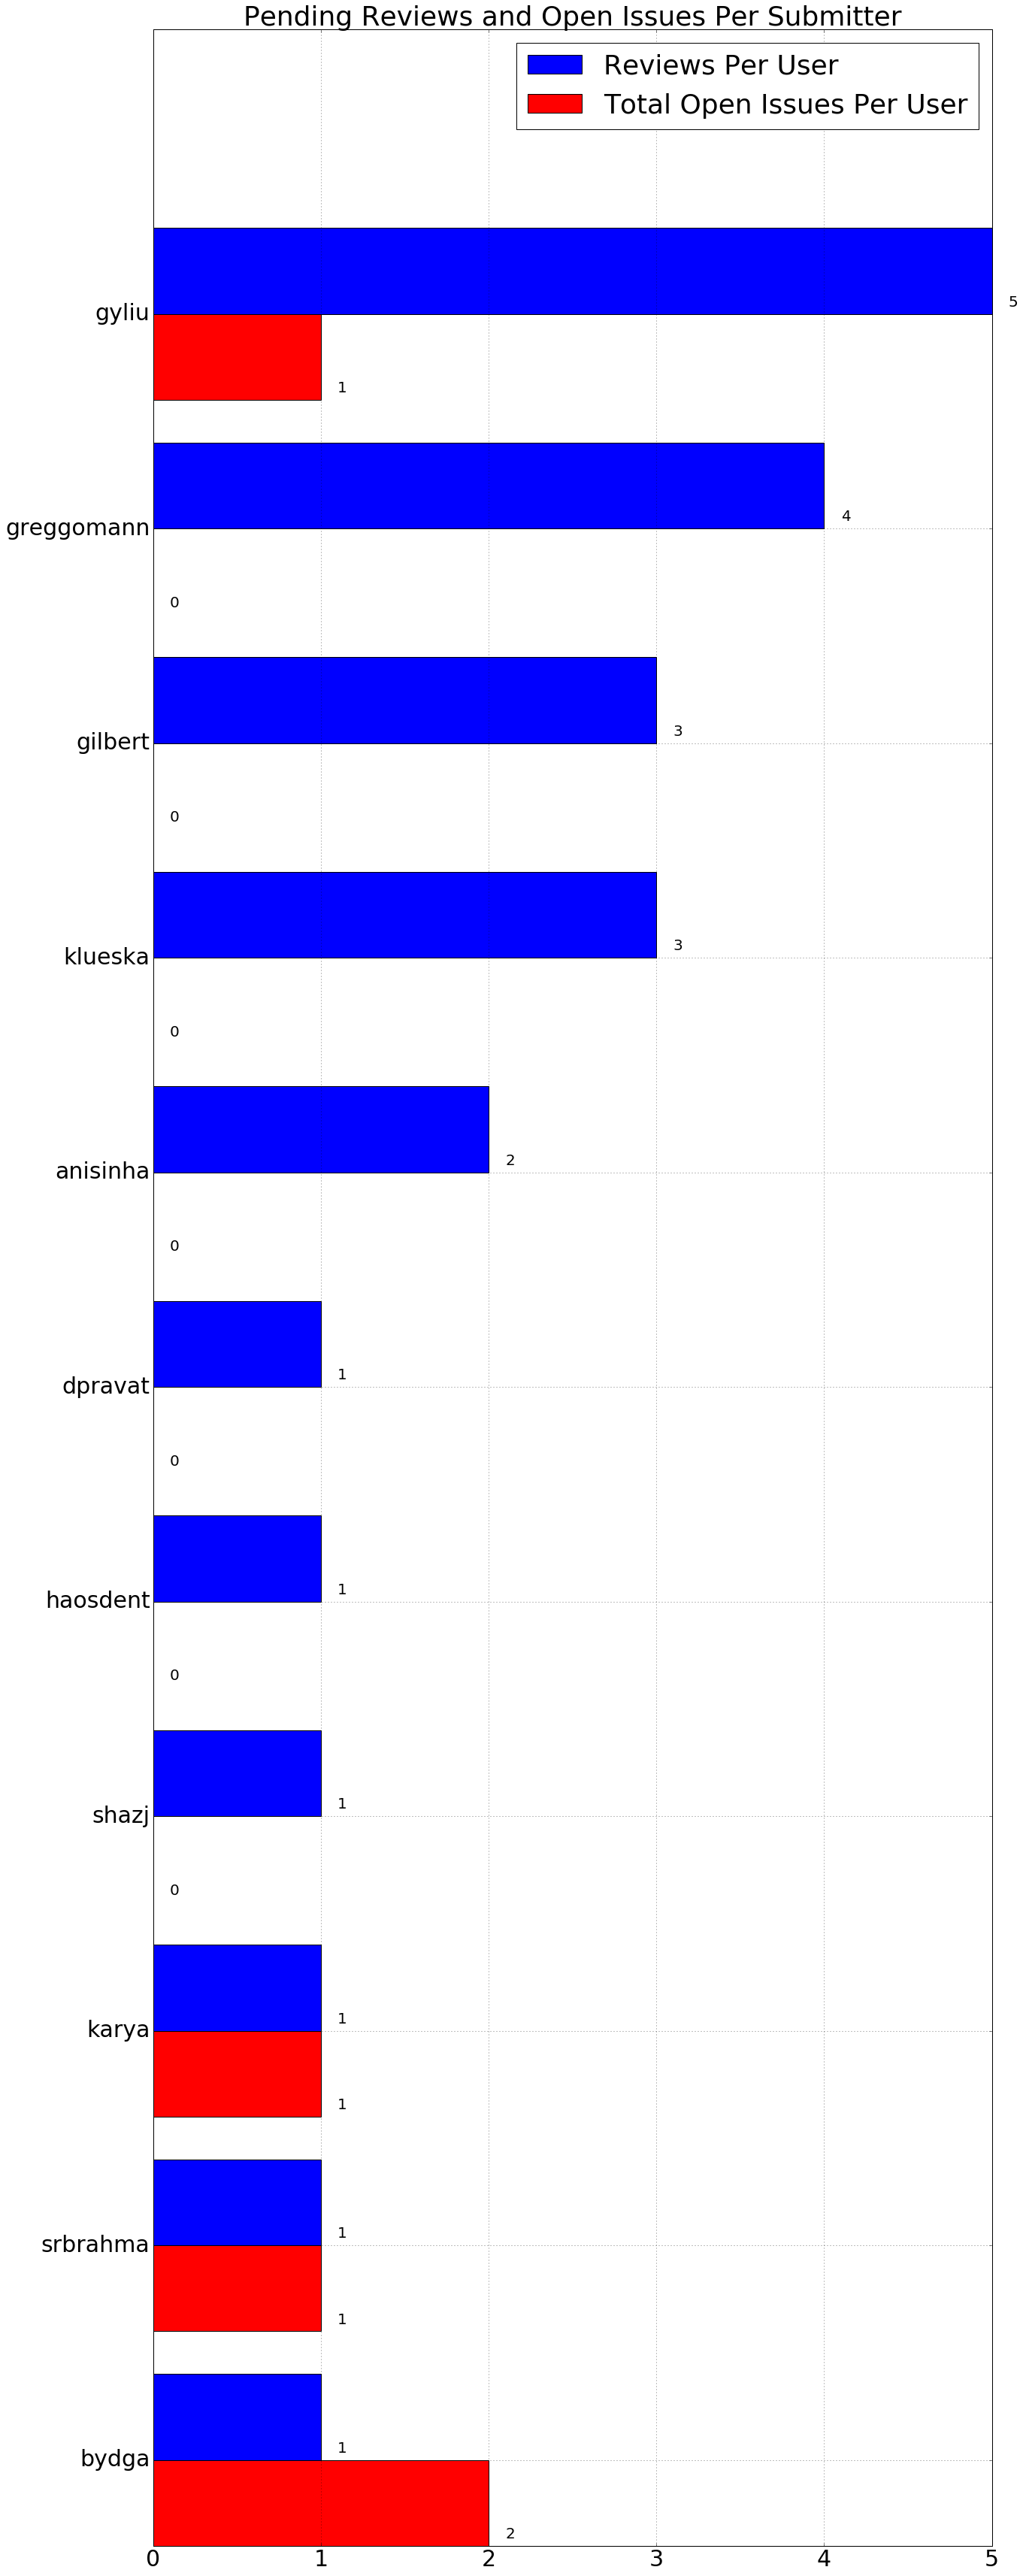

In [4]:
# Fetch the data.
per_user = m.reviews_per_user(reviews)
chart = m.convert_to_chart(per_user['review_count'])
chart2 = per_user['open_issues']

# Set up the chart.
font = {'size' : 30}
rc('font', **font)
pyplot.figure(figsize = (20.0, 60.0))
pylab.grid()
pylab.title('{firstletter}{stat} Reviews and Open Issues Per Submitter'.format(firstletter=stat[0].upper(), 
                                                                               stat=stat[1:]))

# Order issues_count values in accordance with review_count values->names
issue_values = []             
sortvalues(chart2, chart, issue_values)

# Populate the chart.
y_positions = arange(len(chart[0]))
plot = pyplot.barh(y_positions + .4, chart[1], .4, color = 'blue')
plot2 = pyplot.barh(y_positions, issue_values, .4, color = 'red')
legend_margin = y_positions.size * 3.5 / 53
pyplot.ylim([0, y_positions.size + legend_margin])
pyplot.legend((plot, plot2),('Reviews Per User','Total Open Issues Per User'))

# Set Y-axis labels.
yt = pyplot.yticks(y_positions + .4, chart[0])

plot_values = []

for value in chart[1]:
    plot_values.append(value)

        
autolabel(plot,plot_values)
autolabel(plot2, issue_values)

Reviews of Defined Type Per Reviewer
---

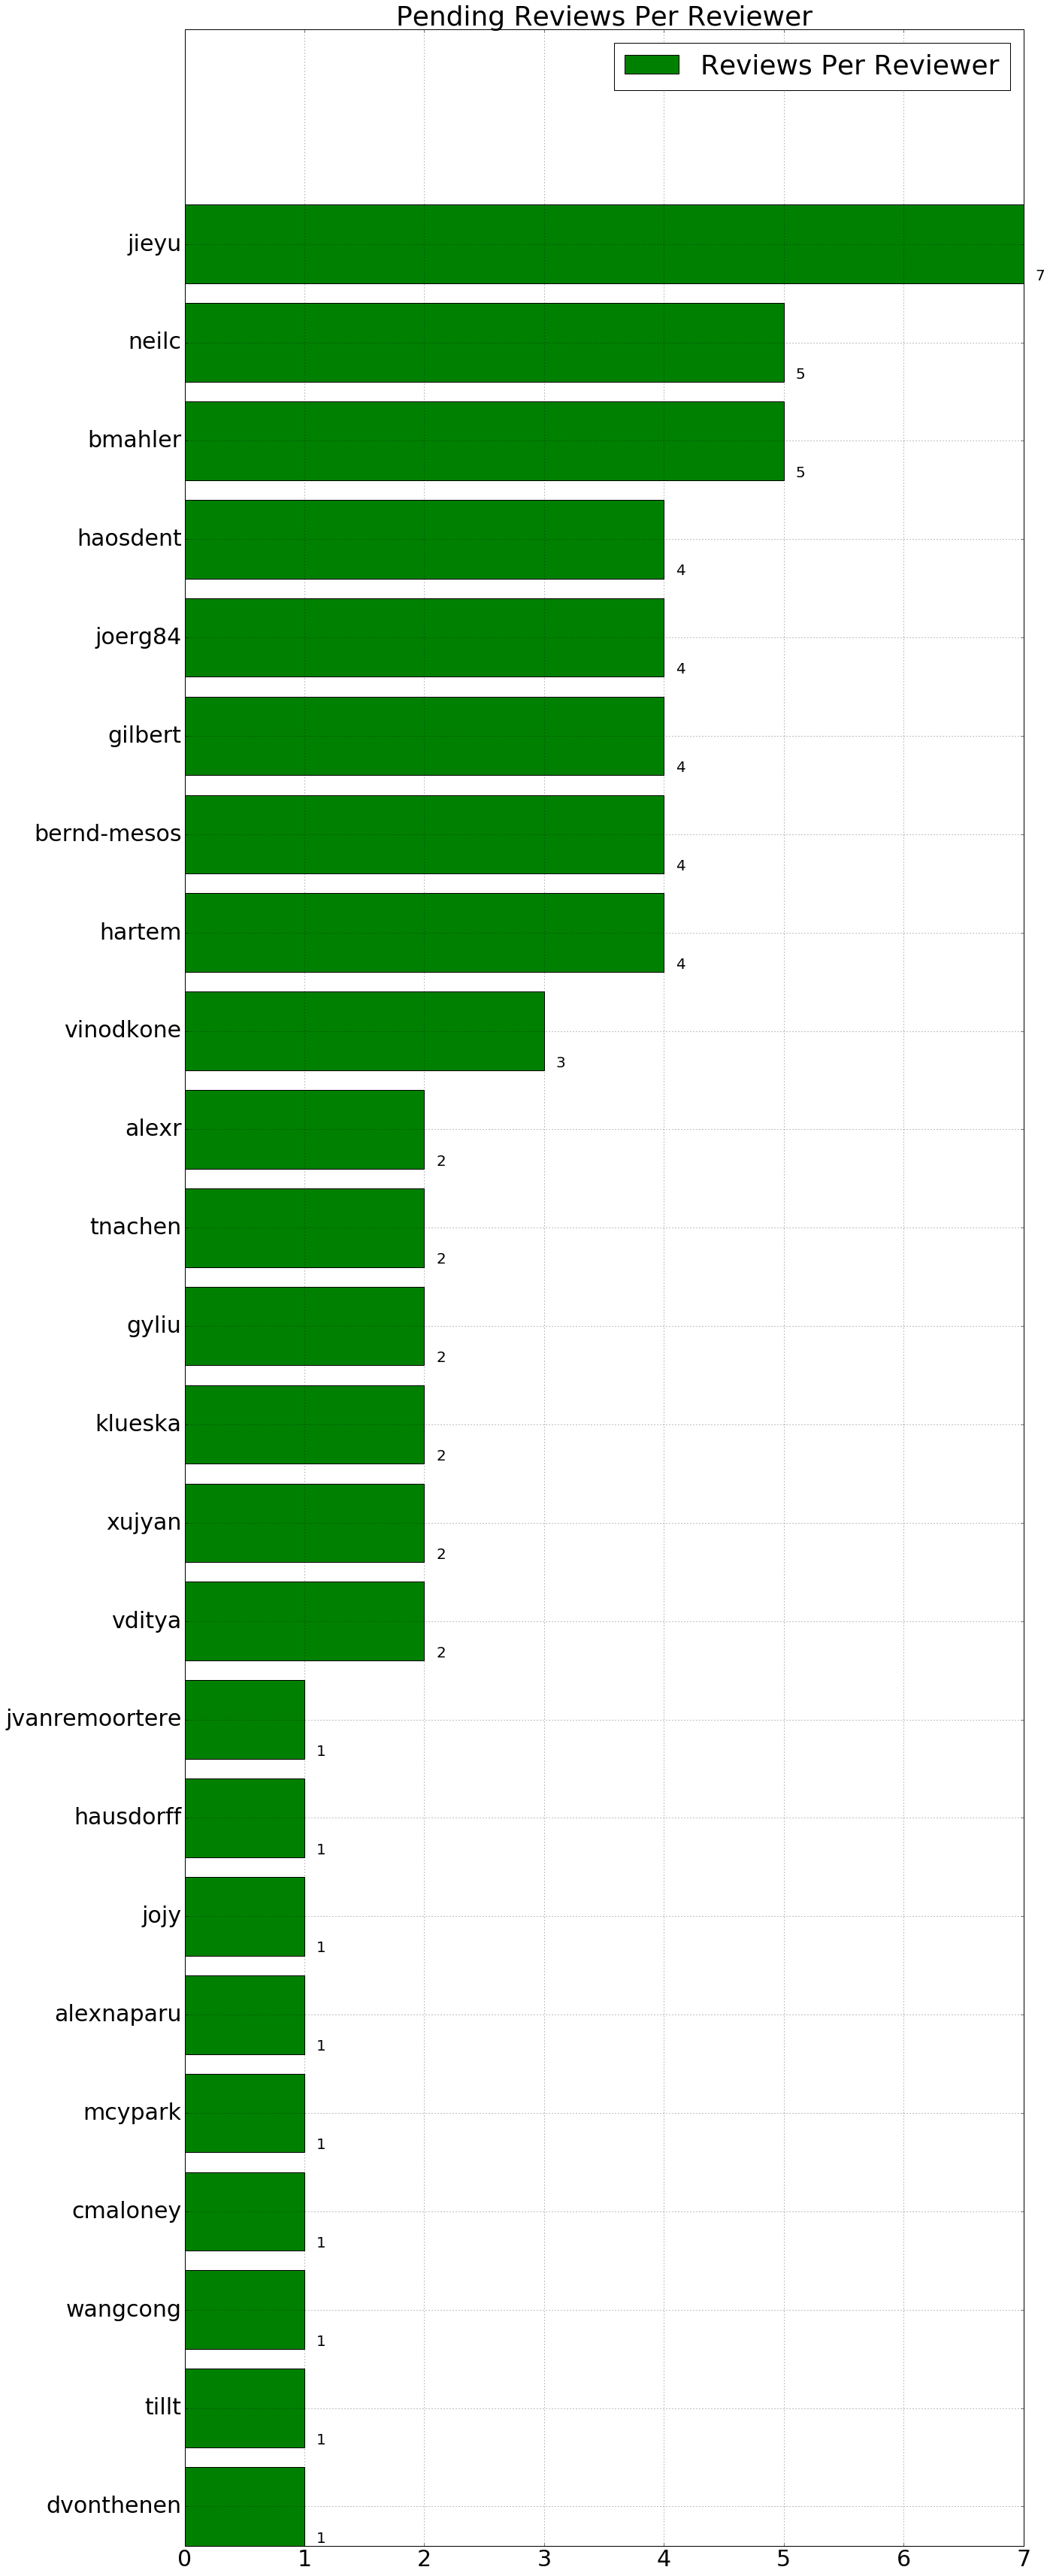

In [5]:
# Fetch the data
per_shepherd = m.reviews_per_shepherd(reviews)
chart = m.convert_to_chart(per_shepherd)

# Set up the chart.
font = {'size' : 30}
rc('font', **font)
pyplot.figure(figsize = (20.0, 60.0))
pylab.grid()
pylab.title('{first}{stat} Reviews Per Reviewer'.format(first=stat[0].upper(), stat=stat[1:]))

# Populate the chart.
y_positions = arange(len(chart[0]))
plot = pyplot.barh(y_positions, chart[1], .8, color = 'green')
legend_margin = y_positions.size * 3.5 / 53
pyplot.ylim([0, y_positions.size + legend_margin])
pyplot.legend((plot,),('Reviews Per Reviewer',))

# Set Y-axis labels.
yt = pyplot.yticks(y_positions + .4, chart[0])
plot_values = []

for value in chart[1]:
    plot_values.append(value)

        
autolabel(plot,plot_values)

Average Resolved Issues Per Submitted Review for Users
---

Fetching submitted reviews from Review Board. Please wait...
Processed 20 reviews.


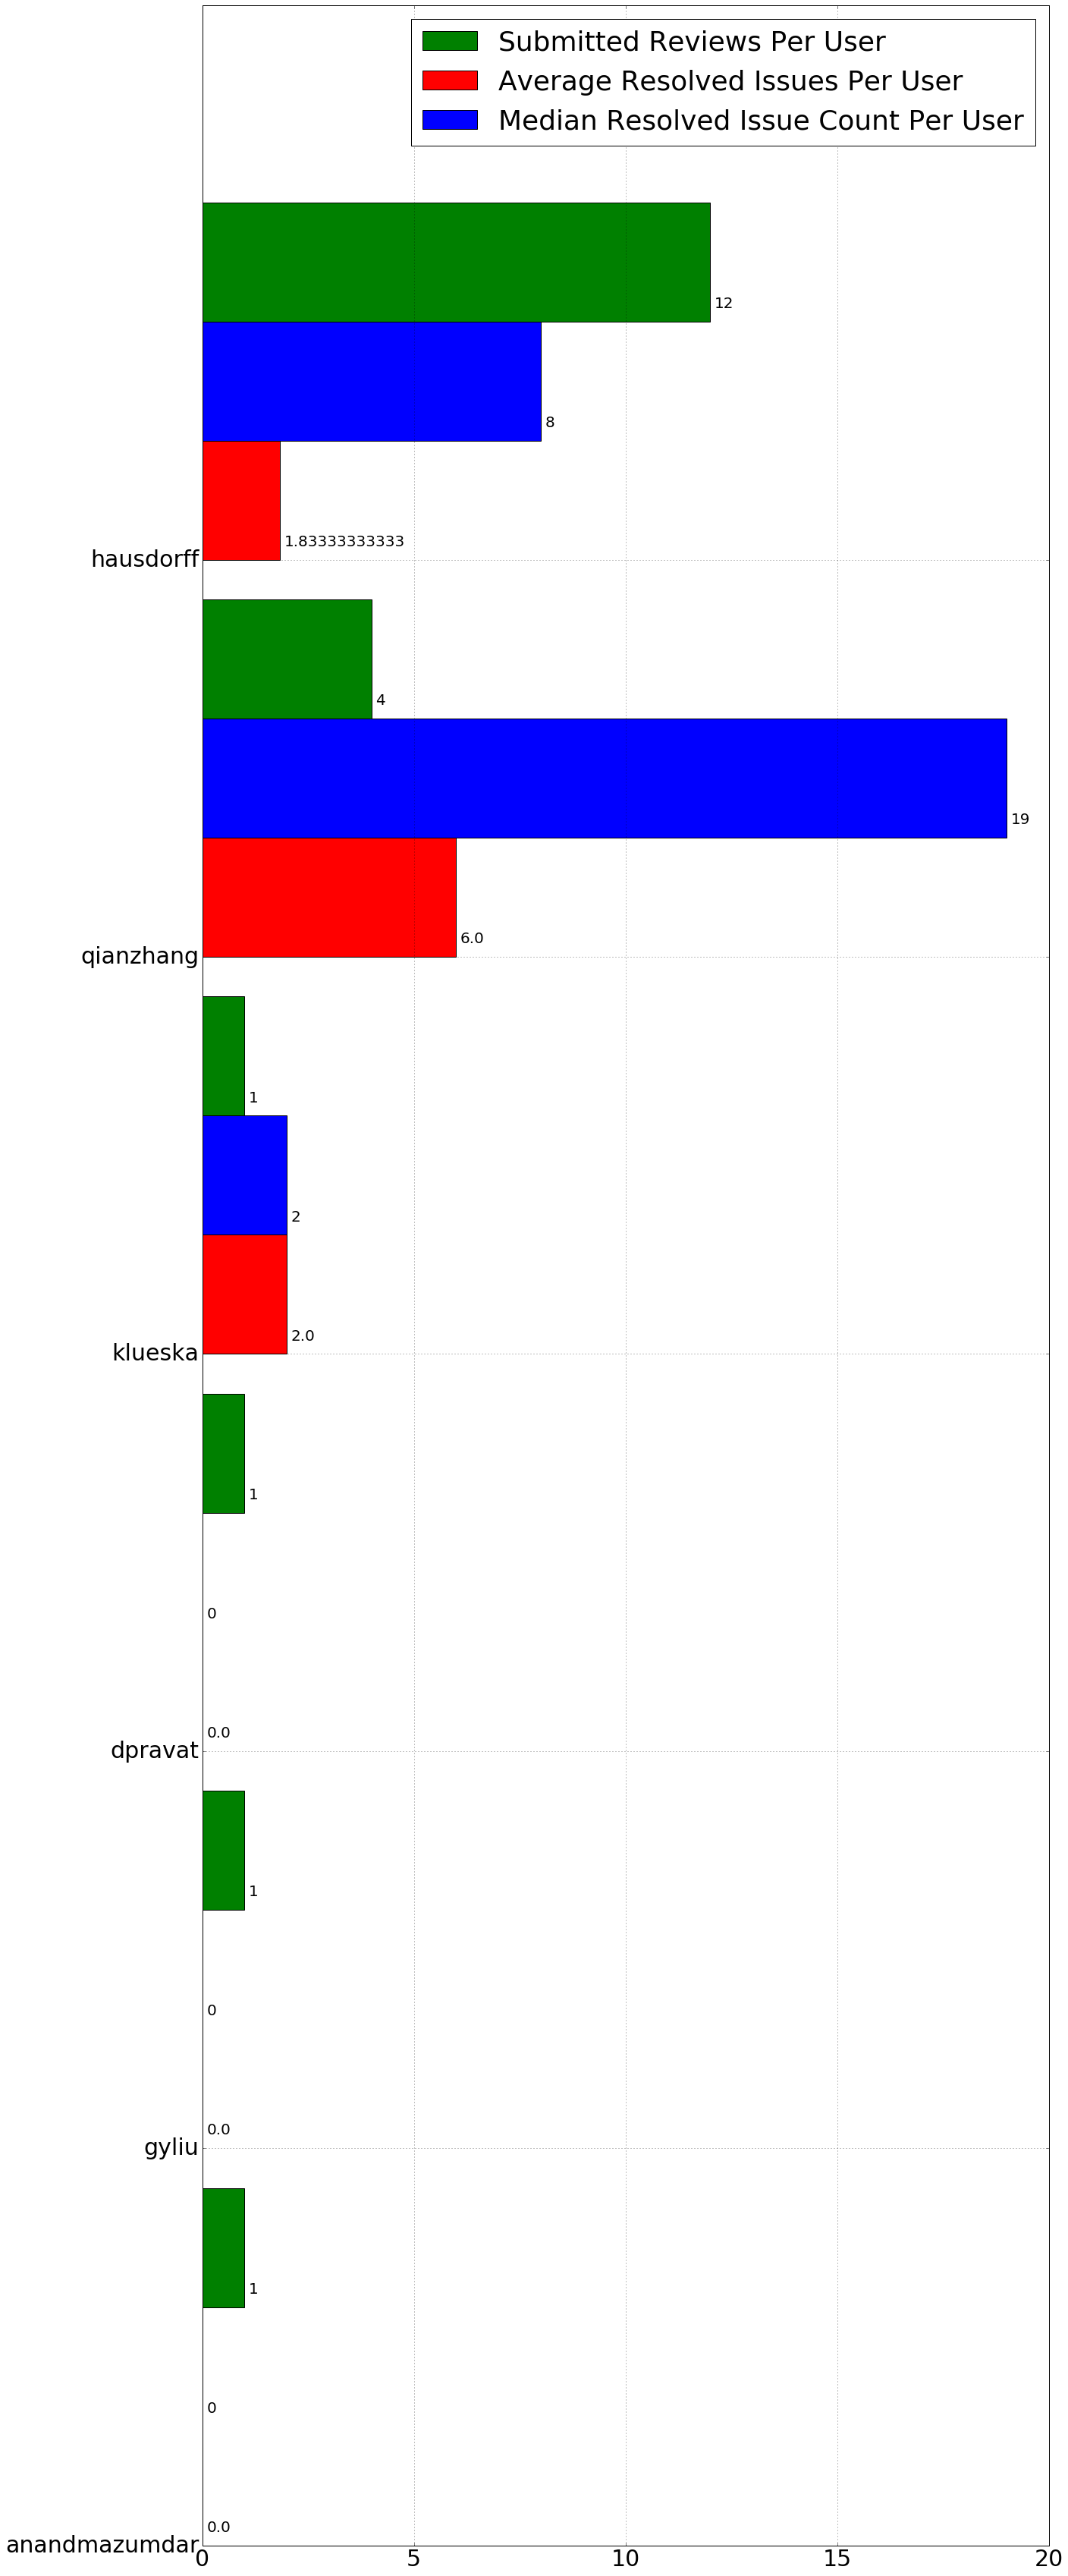

In [6]:
# Cut Off Date, change value of CUTOFF_DAYS if you want to redefine the cut off for the next fetch
CUTOFF_DAYS = CUTOFF_DAYS

# Fetch the data
chart = m.fetch_specific(CUTOFF_DAYS, 0, 'submitted')
issues_chart = chart['avg_issue_per_review']
review_chart = m.convert_to_chart(chart['review_count'])
median_chart = chart['median_issue']

# Set up the chart
font = {'size' : 30}
rc('font', **font)
pyplot.figure(figsize = (20.0, 60.0))
pylab.grid()
#pylab.title('{first}{stat} Average Resolved Issues Per Submitted Review for Users'.format(first=stat[0].upper(),\
                                                                                          #stat=stat[1:]))

# Order issues_count values in accordance with review_count values->names
issue_values = []
median_values = []
               
median_chart = sortvalues(median_chart, review_chart, median_values)
issue_chart = sortvalues(issues_chart, review_chart, issue_values)

# Populate the chart.
y_positions = arange(len(review_chart[0]))
plot = pyplot.barh(y_positions, issue_values, .3, color = 'red')
plot2 = pyplot.barh(y_positions + .6, review_chart[1], .3, color = 'green')
plot3 = pyplot.barh(y_positions + .3, median_values, .3, color = 'blue')
legend_margin = y_positions.size * 3.5 / 53
pyplot.ylim([0, y_positions.size + legend_margin])
pyplot.legend((plot2, plot, plot3),('Submitted Reviews Per User',\
                                    'Average Resolved Issues Per User',\
                                    'Median Resolved Issue Count Per User'))

# Set Y-axis labels.
yt = pyplot.yticks(y_positions, review_chart[0])
plot_values = []

for value in review_chart[1]:
    plot_values.append(value)
        
autolabel(plot2,plot_values)
autolabel(plot,issue_values)
autolabel(plot3,median_values)

Ignored pending Submitter Reviews
---

Fetching pending reviews from Review Board. Please wait...
Processed 26 reviews.


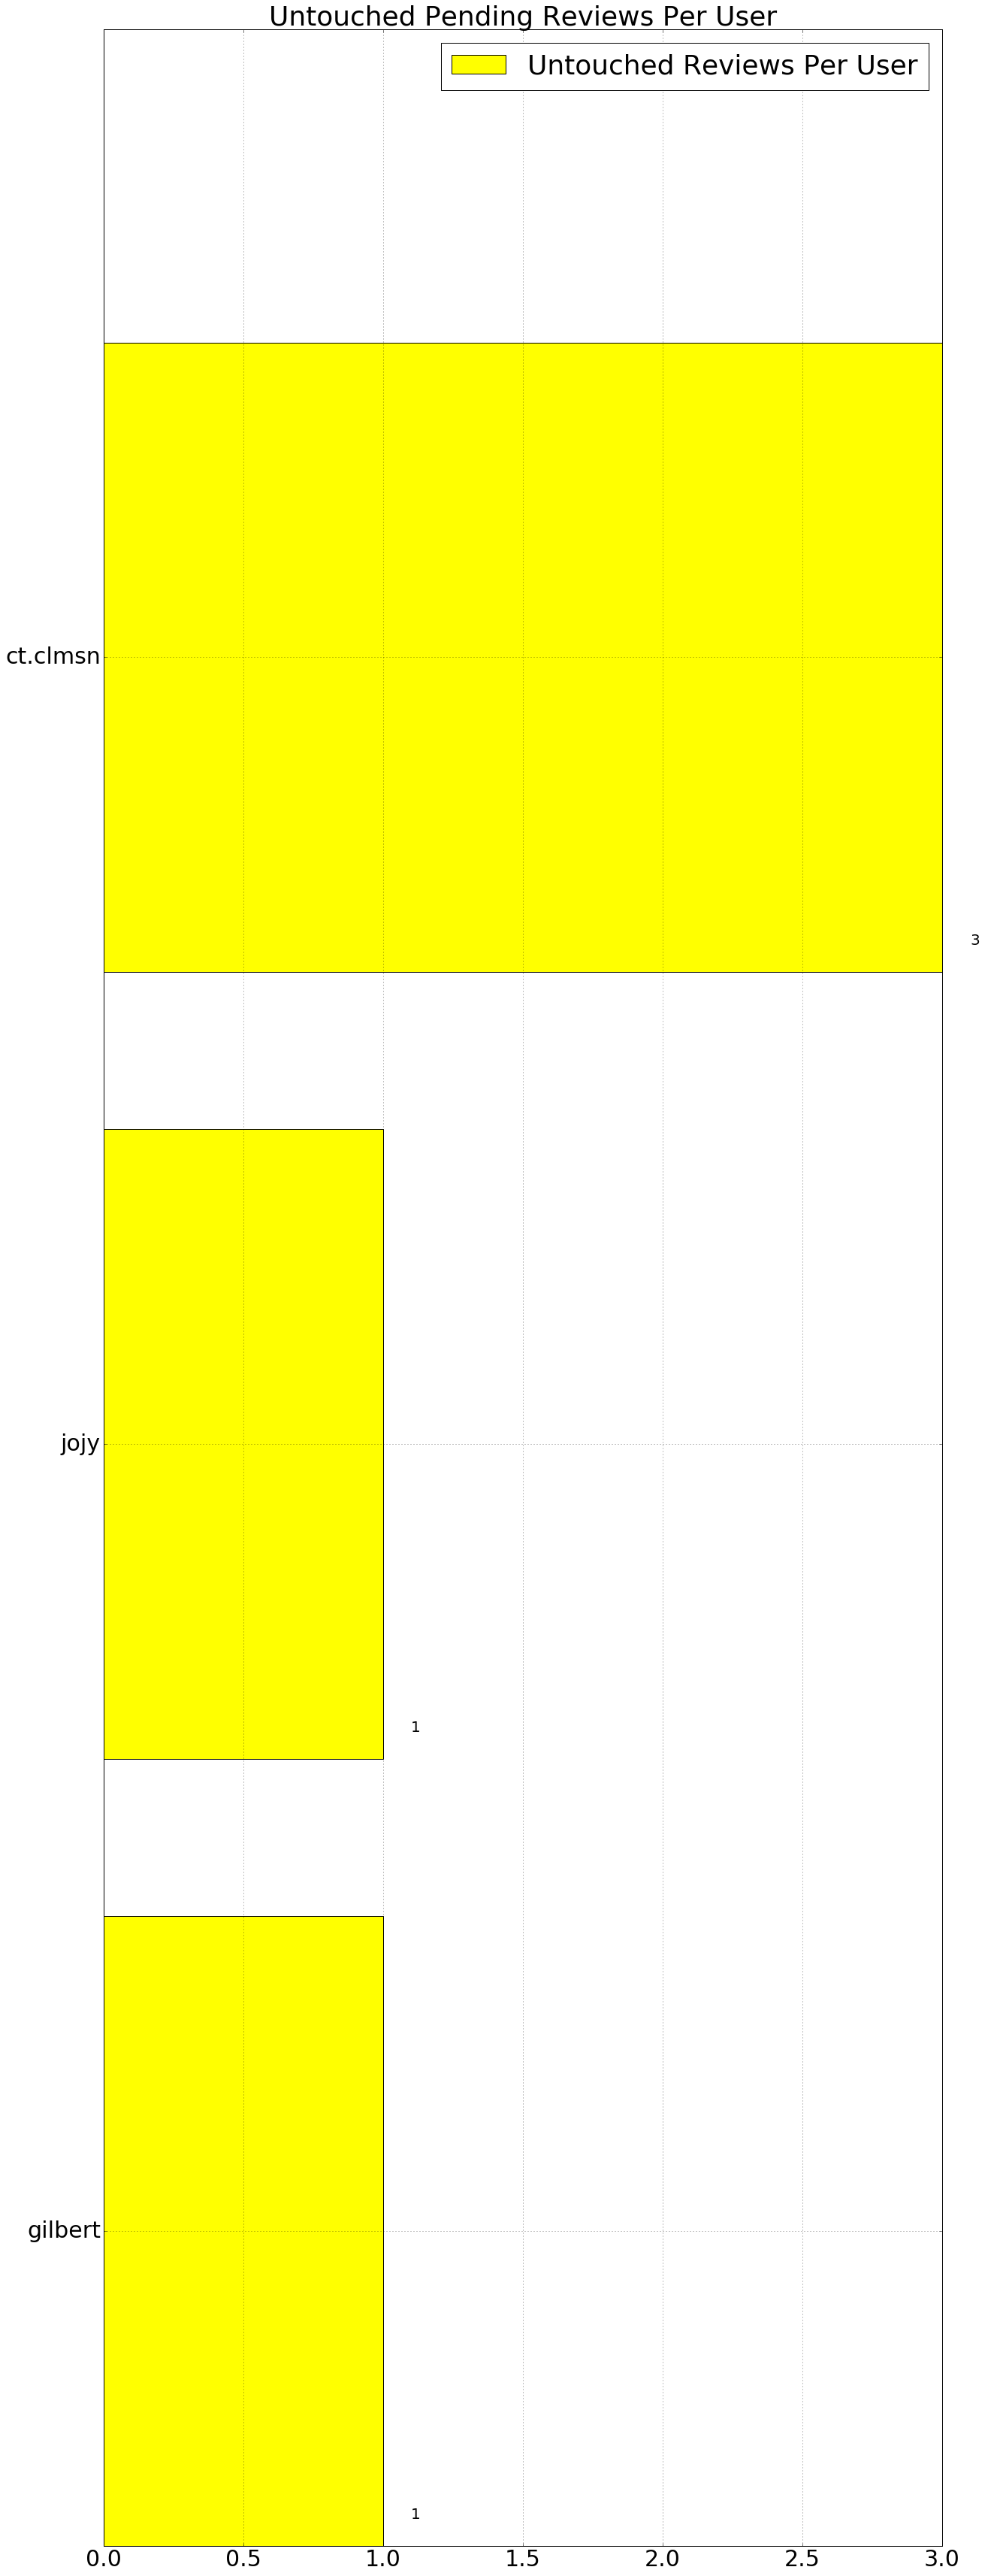

In [7]:
# Cut Off Date, change value of CUTOFF_DAYS if you want to redefine the cut off for the next fetch
cutoff_from = 13
cutoff_to = 10

# Fetch reviews
chart = m.convert_to_chart(m.fetch_untouched(cutoff_from ,cutoff_to ,'pending'))

# Set up the chart.
font = {'size' : 30}
rc('font', **font)
pyplot.figure(figsize = (20.0, 60.0))
pylab.grid()
pylab.title('Untouched {first}{stat} Reviews Per User'.format(first=stat[0].upper(), stat=stat[1:]))

# Populate the chart.
y_positions = arange(len(chart[0]))
plot = pyplot.barh(y_positions, chart[1], .8, color = 'yellow')
legend_margin = y_positions.size * 3.5 / 53
pyplot.ylim([0, y_positions.size + legend_margin])
pyplot.legend((plot,),('Untouched Reviews Per User',))

# Set Y-axis labels.
yt = pyplot.yticks(y_positions + .4, chart[0])
plot_values = []

for value in chart[1]:
    plot_values.append(value)

        
autolabel(plot,plot_values)